# Relative feature tightness of fragments using part 8 for test data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import numpy as np

from ast import literal_eval
import re
import sys
sys.path.insert(0,"./../fip3")
from fip import profiles

## Dataset prep

### Making feature pointwise mutual information profiles

In [2]:
profile0 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp0_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile1 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp1_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile2 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp2_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile3 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp3_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile4 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp4_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile5 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp5_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile6 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp6_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile7 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp7_38629.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38629)
profile9 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp9_38629.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38629)

In [3]:
profile0.add_another_cooccurrence_profile(profile1)
profile0.add_another_cooccurrence_profile(profile2)
profile0.add_another_cooccurrence_profile(profile3)
profile0.add_another_cooccurrence_profile(profile4)
profile0.add_another_cooccurrence_profile(profile5)
profile0.add_another_cooccurrence_profile(profile6)
profile0.add_another_cooccurrence_profile(profile7)
profile0.add_another_cooccurrence_profile(profile9)

In [4]:
probability_profile = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(profile0)

In [5]:
reference_profile0 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp0_37902.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37902)
reference_profile1 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp1_37902.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37902)
reference_profile2 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp2_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile3 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp3_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile4 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp4_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile5 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp5_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile6 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp6_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile7 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp7_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile9 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp9_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)

In [6]:
reference_profile0.add_another_cooccurrence_profile(reference_profile1)
reference_profile0.add_another_cooccurrence_profile(reference_profile2)
reference_profile0.add_another_cooccurrence_profile(reference_profile3)
reference_profile0.add_another_cooccurrence_profile(reference_profile4)
reference_profile0.add_another_cooccurrence_profile(reference_profile5)
reference_profile0.add_another_cooccurrence_profile(reference_profile6)
reference_profile0.add_another_cooccurrence_profile(reference_profile7)
reference_profile0.add_another_cooccurrence_profile(reference_profile9)

In [7]:
reference_probability_profile = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(reference_profile0)

### Making feature pointwise KL divergence profile between COCONUT and ZINC

In [8]:
difference_pkld_profile = profiles.PointwiseKLDivergenceProfile.from_cooccurrence_probability_profiles(
    probability_profile, reference_probability_profile)
difference_pkld_profile.df

value
feature1                           feature2                                                
[CH2][CH2][CH2][CH2][CH]           [CH2][CH2][CH2][CH2][CH]                        1.845181
                                   [CH2][CH2][CH]([C]([CH2])=[O])[CH]([CH2])[CH2]  3.142456
                                   [CH2][CH2][C](=[O])[CH]([CH2])[CH]              4.949811
                                   [CH3][CH2][CH2][CH2]                            4.190885
                                   [CH3][CH2][CH2][CH2][CH2]                       4.430804
...                                                                                     ...
[CH][CH2][CH2][S]([CH2])(=[O])=[O] [CH][NH][CH2][S]([CH2])(=[O])=[O]              -0.027473
                                   [C][CH]([CH2])[NH][CH2][S]                     -0.027473
[CH][NH][CH2][S]([CH2])(=[O])=[O]  [C][CH]([CH2])[NH][CH2][S]                     -0.027473
                                   [C][CH]([NH])[CH2][CH2][S]                     -0.027473
[C][CH]([CH2])[NH][CH2][S]         [C][CH]([NH])[CH2][CH2][S]                     -0.027473

[28957230 rows x 1 columns]

### Sampling structures from COCONUT and ZINC datasets

In [9]:
coconut_samples = pd.read_csv('../data/CPF/COCONUT/COCOrandomF.csv', delimiter = ' ')
coconut_samples = coconut_samples.drop(['Coconut_id'], axis=1)
coconut_samples['Name'] = 'COCONUT'

In [10]:
df_split_coco = np.array_split(coconut_samples, 10)

In [11]:
df_split_coco[8]

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset,Fragments
309039,COc1cc2c(cc1OC)C1C(CC=C3CC[NH+](C)C31)OC2=O,316.154335,0.94350,WXZAKVLYZHWSNF-UHFFFAOYSA-O,WXZAKVLYZHWSNF,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[4, 40, 57, 149, 249, 314, 352, 415, 497, 598,...","'[CH]=[C]([CH])[CH2][CH2][NH+]', '[C][CH2][CH2..."
309040,COc1ccc(-c2cc(C(=O)N3CC4CC(C3)c3ccc([N+](=O)[O...,465.164833,2.42330,HKNUGKSQKPYATJ-UHFFFAOYSA-N,HKNUGKSQKPYATJ,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[74, 82, 94, 126, 140, 143, 208, 249, 314, 354...","'[c]-[c]([cH])[cH][c]([c])[O]', '[cH][c]([CH])..."
309041,CCC(C)C(N=C(O)C(Cc1c[nH]c2ccccc12)N=C(O)CN=C(O...,1377.729251,7.84631,BYDBXYKAICAWBU-UHFFFAOYSA-N,BYDBXYKAICAWBU,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 48, 79, 80, 82, 119, 177, 227, 272, 283, 2...","'[cH][cH][cH][cH][c]', '[cH][cH][cH][cH][cH]',..."
309042,COc1cc2c(c(OC)c1OC)-c1ccc(NCCCC(=O)Nc3ccc4[nH]...,629.248563,3.22360,JXXSUHVMXZLYCG-UHFFFAOYSA-N,JXXSUHVMXZLYCG,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[41, 80, 119, 125, 184, 191, 232, 245, 249, 30...","'[c][c]([c])[O][CH3]', '[c][c]([CH2])[cH][c]([..."
309043,COC1(CC2C(=O)NC(c3ccc(O)cc3)CC(=O)OC(C)CC(C)C=...,692.342129,4.66690,FOEVCQQBKHZRMA-UHFFFAOYSA-N,FOEVCQQBKHZRMA,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[5, 63, 80, 194, 206, 231, 250, 293, 301, 314,...","'[cH][cH][c]([OH])[cH][cH]', '[cH][cH][cH][cH]..."
...,...,...,...,...,...,...,...,...,...
347663,COC(=O)C1(C)CCC2(C)CCC3(C)C4=CC(=O)c5c(cc(O)c(...,494.266839,5.87660,HFOZJSCLBUTFCX-UHFFFAOYSA-N,HFOZJSCLBUTFCX,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[84, 173, 202, 273, 282, 314, 350, 363, 401, 4...",'[C][CH]=[C]([C]([c])([CH3])[CH2])[C]([CH2])([...
347664,COc1cc2oc(=O)ccc2c(OC)c1CC(=O)C(C)C,290.115424,2.57780,UBBJEHXBMMIIEU-UHFFFAOYSA-N,UBBJEHXBMMIIEU,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 80, 109, 183, 239, 249, 283, 293, 314, 325...","'[cH][c](=[O])[o][c]([cH])[c]', '[c][c]([c])[O..."
347665,Cc1cc(O)c2c(c1O)C(=O)C1=C(C2=O)C(O)=CC(O)C1,288.063388,1.28832,SCBOIQFQZQTWSW-UHFFFAOYSA-N,SCBOIQFQZQTWSW,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[167, 202, 203, 231, 269, 314, 395, 410, 420, ...","'[c][cH][c]([CH3])[c]([c])[OH]', '[C][C](=[C])..."
347666,NC(=O)C(O)C(N)C(=O)O,148.048407,-2.75550,VQTLPSCRBFYDNX-UHFFFAOYSA-N,VQTLPSCRBFYDNX,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 121, 140, 227, 389, 412, 650, 727, 786, 80...","'[C][CH]([NH2])[CH]([OH])[C]([NH2])=[O]', '[C]..."


In [12]:
zinc_samples = pd.read_csv('../data/CPF/ZINC/ZINCrandomF.csv', delimiter = ' ')
zinc_samples = zinc_samples.drop(['Zinc_id'], axis=1)

In [13]:
df_split_zinc = np.array_split(zinc_samples, 10)
df_split_zinc[8]

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset,Fragments
303210,COc1cc(CCC(C)=O)ccc1OC(=O)c1c(-c2c(F)cccc2Cl)n...,431.093579,5.19192,LXIUVLOXXFPIEC-UHFFFAOYSA-N,LXIUVLOXXFPIEC,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 94, 104, 145, 226, 248, 249, 310, 323, 36...","'[c]-[c]([c])[n][o][c]', '[c][cH][c]([cH][cH])..."
303211,CC1=C(C(=O)OCc2ccccc2)[C@@H](c2ccccc2C)n2nc(-c...,470.150954,5.93922,ZWZZHAJSTBNYJD-XMMPIXPASA-N,ZWZZHAJSTBNYJD,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[45, 71, 80, 95, 145, 147, 168, 199, 216, 371,...","'[C]=[C]([CH])[C](=[O])[O][CH2]', '[cH][cH][cH..."
303212,CCc1ccc2oc(-c3cccc(NC(=O)C(C)C)c3)nc2c1,308.152478,4.65170,AUYCCXHFQBCPQW-UHFFFAOYSA-N,AUYCCXHFQBCPQW,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 80, 145, 155, 184, 191, 283, 294, 310, 372...","'[cH][c]([cH])[CH2][CH3]', '[cH][cH][c]([cH][c..."
303213,N/C(=N/C[C@H]1CCCSC1)N1CCN(c2ccc(F)cc2)CC1,336.178396,2.40560,VABUAJLKDGQAMD-CQSZACIVSA-N,VABUAJLKDGQAMD,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[29, 80, 90, 140, 174, 233, 407, 484, 593, 624...","'[c][cH][cH][c]([cH])[F]', '[CH2][N]=[C]([NH2]..."
303214,C[C@H](CO)NC(=O)CSc1nc2[nH]ncc2c(=O)n1-c1ccccc1,359.105210,0.69790,AEJMUYKDTAMAQT-SNVBAGLBSA-N,AEJMUYKDTAMAQT,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 41, 58, 74, 80, 86, 97, 116, 117, 222, 283...","'[c][cH][n][nH][c]', '[CH][NH][C](=[O])[CH2][S..."
...,...,...,...,...,...,...,...,...,...
341106,CCOC(=O)c1c(-c2ccc(OC)cc2)csc1NC(=O)CSc1nc(C)n...,539.100719,6.13302,OUXYYASGVNESMO-UHFFFAOYSA-N,OUXYYASGVNESMO,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[14, 32, 41, 42, 50, 54, 80, 116, 145, 147, 16...","'[c][c]([s])[NH][C]([CH2])=[O]', '[c][n][c]([S..."
341107,COCC(=O)N1CCN2C[C@H]1C(=O)NC[C@H]1O[C@@H](CC(=...,593.225241,-1.90600,ZRKVEFGZSCOBIL-RKRMHJIESA-N,ZRKVEFGZSCOBIL,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[5, 80, 132, 134, 165, 216, 231, 238, 242, 244...","'[C][NH][CH]([CH2][CH])[CH2][N]', '[c][cH][c](..."
341108,COc1ccc(CN2C(=O)c3oc4ccccc4c(=O)c3[C@H]2c2cc(B...,521.047399,5.02370,KBFSRBDMAYAUHM-JOCHJYFZSA-N,KBFSRBDMAYAUHM,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 161, 202, 227, 249, 310, 314, 322, 343, 3...","'[cH][c]([cH])[O][CH3]', '[C][c]([c])[o][c]([c..."
341109,C[C@@H](NC(=O)c1cccc(OCc2ccccc2)c1)c1ccc(S(C)(...,409.134779,4.16010,NGCVREZJJNBAKZ-QGZVFWFLSA-N,NGCVREZJJNBAKZ,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 30, 80, 107, 117, 283, 319, 322, 350, 389,...","'[C][c]([cH])[cH][cH][cH]', '[cH][cH][cH][c]([..."


In [14]:
joint_samples = pd.concat((df_split_coco[8], df_split_zinc[8]), ignore_index=True)

In [15]:
for x in joint_samples.index:
    a = joint_samples['Fragments'][x]
    tup = literal_eval(a)
    joint_samples['Fragments'][x] = tup

/var/tmp/pbs.43587.lich-compute.vscht.cz/ipykernel_36908/2190264476.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_samples['Fragments'][x] = tup


## Relative feature tightness against a PMI interrelation profile

In [16]:
joint_samples['RFT'] = joint_samples['Fragments'].apply(
    lambda x: difference_pkld_profile.relative_feature_divergence(x))

/home/liskovaf/.conda/envs/coco/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


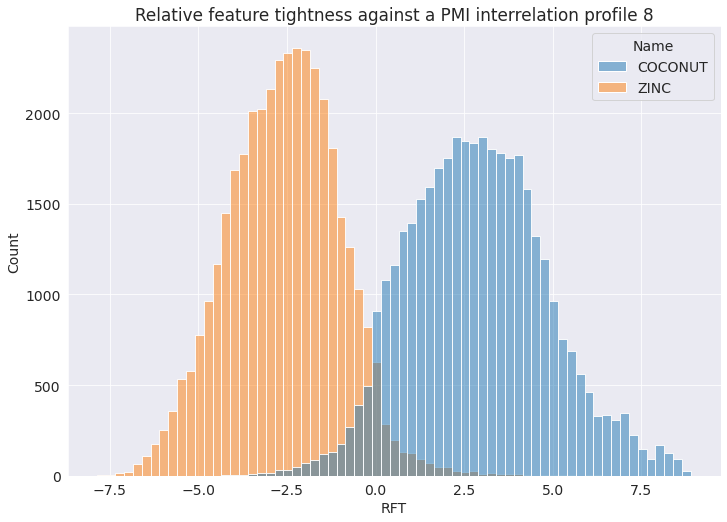

In [17]:
plt.rcParams['font.size'] = '14'
a4_dims = (11.7, 8.27)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(joint_samples, x='RFT', hue='Name')
plt.title('Relative feature tightness against a PMI interrelation profile 8')
plt.savefig(f"../images//joint_samples_RFT8F.svg", format="svg")

According to the histogram, there is a visible split between Relative feature tightness distribution against the pointwise KL divergence profile between COCONUT and ZINC datasets, based on their radius 2 fragments. Larger fragments might diverge even further.

# ROC curve

In [18]:
joint_samples[joint_samples['RFT'].isna()]

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset,Fragments,RFT
38468,C[As](C)(C)(C)Br,213.933834,2.8,PCZGZQPGIPQNDK-UHFFFAOYSA-N,PCZGZQPGIPQNDK,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[105, 273, 387, 728, 1057, 1878]",{},NaN


In [19]:
joint_samples = joint_samples[joint_samples['RFT'].notna()]

In [20]:
joint_samples[joint_samples['RFT'].isna()]

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset,Fragments,RFT


In [21]:
from matplotlib.pyplot import figure
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(joint_samples['Name'], joint_samples['RFT'], pos_label = 'COCONUT')
roc_auc = metrics.auc(fpr, tpr)

In [22]:
roc_auc 

0.9865531458752093

<Figure size 432x288 with 0 Axes>

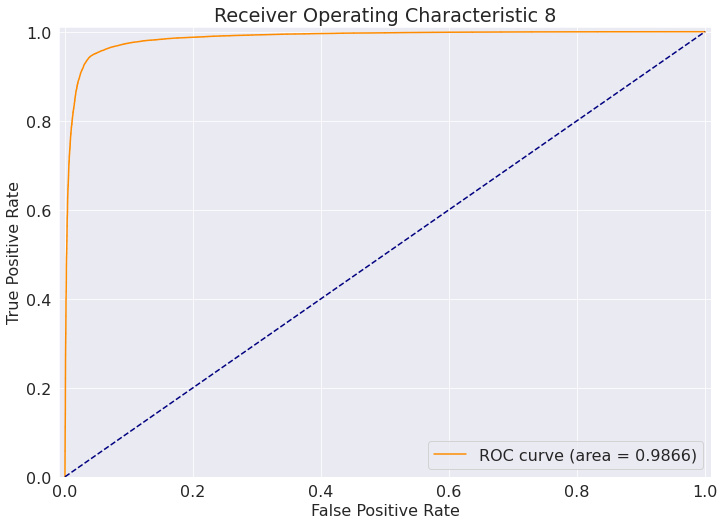

In [23]:
plt.rcParams['font.size'] = '16'
plt.figure()
figure(figsize=(11.7, 8.27))
plt.plot(fpr,tpr,color="darkorange",label="ROC curve (area = %0.4f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic 8')
plt.legend(loc="lower right")
plt.savefig(f"../images//joint_samples_ROC8F.svg", format="svg")
plt.show()